# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تشخیص خط با Hough Transform</div>

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">در ابتدا تصویر را باینری میکنیم</div>

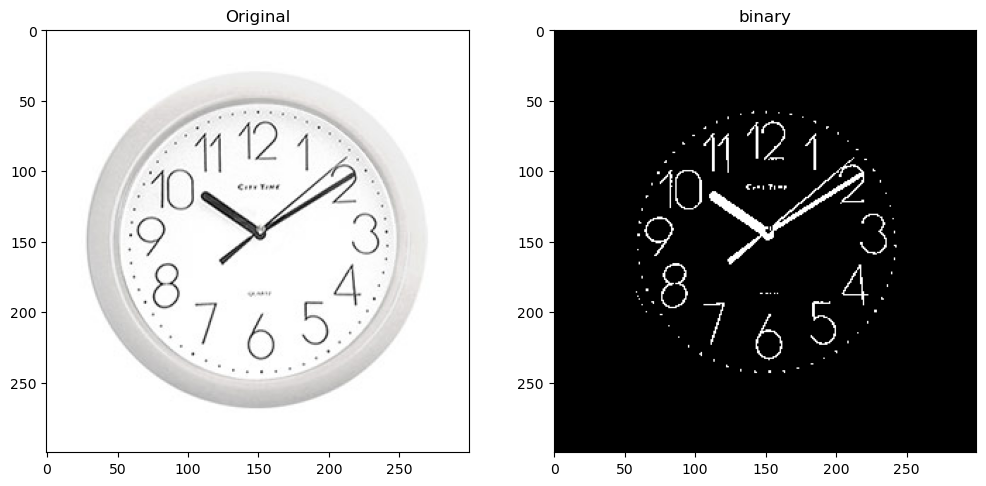

In [1]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
image = cv2.imread("images/clock.jpg")


# Convert BGR back to grayscale:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold via Otsu:
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.figure(figsize=[12,7])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(122);plt.imshow(binary, cmap='gray');plt.title("binary");

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سپس با  عملیات مروفولوژی فقط قسمت های مد نظر را نگه میداریم!</div>

### <div style="direction:rtl;text-align:right;font-family:Tahoma">جهت یاداوری:
</div>

**Opening:**
$$dilate( erode( src, element ) )$$
<div style="direction:rtl;text-align:right;font-family:Tahoma">
مفید برای حذف اشیاء کوچک (فرض می شود که اشیاء در یک پیش زمینه تاریک روشن هستند)
</div>

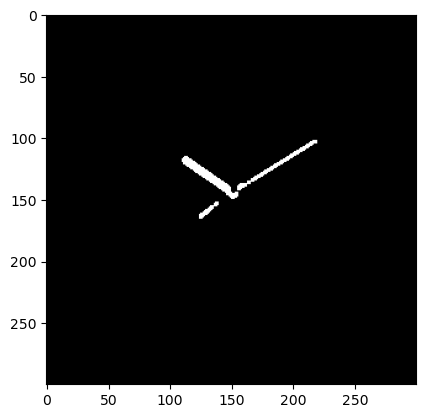

In [2]:
# Get the structuring element:
structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, structuringElement)
plt.imshow(opening, cmap='gray')

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تخمین خط با HoghLine و مشاهده نتیجه!</div>

In [ ]:
# Set HoughLinesP parameters:
lineThresh = 50
minLineLength = 20
maxLineGap = 100

# Run the line detection:
lines = cv2.HoughLinesP(opening, 1, np.pi/180 , lineThresh, None, minLineLength, maxLineGap)

# Prepare some lists to store every coordinate of the detected lines:
X1 = []
X2 = []
Y1 = []
Y2 = []
draw_image = image.copy()
# Store and draw the lines:
for [line] in lines:
    # First point:
    x1 = line[0]
    y1 = line[1]
    X1.append(x1)
    Y1.append(y1)

    # Second point:
    x2 = line[2]
    y2 = line[3]
    X2.append(x2)
    Y2.append(y2)

    # Draw the lines:
    cv2.line(draw_image, (x1,y1), (x2,y2), (0,0,255), 2)
    cv2.imshow("Lines", draw_image)
    cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(draw_image[...,::-1], cmap='gray')

QObject::moveToThread: Current thread (0x1f06b60) is not the object's thread (0x25be8b0).
Cannot move to target thread (0x1f06b60)

QObject::moveToThread: Current thread (0x1f06b60) is not the object's thread (0x25be8b0).
Cannot move to target thread (0x1f06b60)

QObject::moveToThread: Current thread (0x1f06b60) is not the object's thread (0x25be8b0).
Cannot move to target thread (0x1f06b60)

QObject::moveToThread: Current thread (0x1f06b60) is not the object's thread (0x25be8b0).
Cannot move to target thread (0x1f06b60)

QObject::moveToThread: Current thread (0x1f06b60) is not the object's thread (0x25be8b0).
Cannot move to target thread (0x1f06b60)

QObject::moveToThread: Current thread (0x1f06b60) is not the object's thread (0x25be8b0).
Cannot move to target thread (0x1f06b60)

QObject::moveToThread: Current thread (0x1f06b60) is not the object's thread (0x25be8b0).
Cannot move to target thread (0x1f06b60)

QObject::moveToThread: Current thread (0x1f06b60) is not the object's thread

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">عقربه های همجهت را حذف میکنیم</div>

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2)

# Reshape the arrays for K-means
X1 = np.array(X1).reshape(-1,1)
Y1 = np.array(Y1).reshape(-1,1)
X2 = np.array(X2).reshape(-1,1)
Y2 = np.array(Y2).reshape(-1,1)

# Stack the data
points = np.hstack((X1, Y1, X2, Y2))
print(points.shape)

kmeans.fit(points)
result = np.array(kmeans.cluster_centers_, dtype='uint8')
print(result)

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">نتیجه ی نهایی</div>

In [ ]:
draw_image = image.copy()
# draw the lines:
for i in range(2):
    x1 = int(result[i][0])
    y1 = int(result[i][1])
    x2 = int(result[i][2])
    y2 = int(result[i][3])

    cv2.line(draw_image, (x1, y1), (x2, y2), (0, 255, 0), 1)
plt.imshow(draw_image[...,::-1])

https://stackoverflow.com/questions/67537837/how-to-detect-clock-hands-with-hough-lines-detection